In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sqlite3
import pandas as pd
import numpy as np
import time


In [6]:
DB_PATH = "/content/drive/MyDrive/work/Finalproject/housing_app_fall25-main/data/student_performance.db"
conn = sqlite3.connect(DB_PATH)

df = pd.read_sql_query("""
SELECT
    s.student_id,
    s.age,
    s.gender,
    s.internet_access,
    s.sleep_hours,
    s.sleep_quality,
    s.class_attendance,
    c.course_name AS course,
    c.study_method,
    c.facility_rating,
    e.exam_difficulty,
    e.study_hours,
    e.exam_score,
    e.pass_fail
FROM students s
JOIN exams e ON e.student_id = s.student_id
JOIN courses c ON c.course_id = e.course_id
ORDER BY s.student_id
""", conn)

conn.close()

print("Rows:", len(df))
print("\nClass distribution:\n", df["pass_fail"].value_counts(normalize=True))

Rows: 20000

Class distribution:
 pass_fail
pass    0.87125
fail    0.12875
Name: proportion, dtype: float64


In [7]:
df.shape
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   internet_access   20000 non-null  object 
 4   sleep_hours       20000 non-null  float64
 5   sleep_quality     20000 non-null  object 
 6   class_attendance  20000 non-null  float64
 7   course            20000 non-null  object 
 8   study_method      20000 non-null  object 
 9   facility_rating   20000 non-null  object 
 10  exam_difficulty   20000 non-null  object 
 11  study_hours       20000 non-null  float64
 12  exam_score        20000 non-null  float64
 13  pass_fail         20000 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 2.1+ MB


student_id           age gender internet_access  sleep_hours  \
count   20000.000000  20000.000000  20000           20000  20000.00000   
unique           NaN           NaN      3               2          NaN   
top              NaN           NaN  other             yes          NaN   
freq             NaN           NaN   6726           16988          NaN   
mean    10000.504600     20.473300    NaN             NaN      7.00856   
std      5773.654959      2.284458    NaN             NaN      1.73209   
min         1.000000     17.000000    NaN             NaN      4.10000   
25%      5000.750000     18.000000    NaN             NaN      5.50000   
50%     10000.500000     20.000000    NaN             NaN      7.00000   
75%     15000.250000     22.000000    NaN             NaN      8.50000   
max     20001.000000     24.000000    NaN             NaN      9.90000   

       sleep_quality  class_attendance course study_method facility_rating  \
count          20000      20000.000000  20000        20000           20000   
unique             3               NaN      7            5               3   
top          average               NaN    bca   self-study          medium   
freq            6694               NaN   2902         4079            6760   
mean             NaN         70.017365    NaN          NaN             NaN   
std              NaN         17.282262    NaN          NaN             NaN   
min              NaN         40.600000    NaN          NaN             NaN   
25%              NaN         55.100000    NaN          NaN             NaN   
50%              NaN         69.900000    NaN          NaN             NaN   
75%              NaN         85.000000    NaN          NaN             NaN   
max              NaN         99.400000    NaN          NaN             NaN   

       exam_difficulty   study_hours    exam_score pass_fail  
count            20000  20000.000000  20000.000000     20000  
unique               3           NaN           NaN         2  
top           moderate           NaN           NaN      pass  
freq              9878           NaN           NaN     17425  
mean               NaN      4.007604     62.513225       NaN  
std                NaN      2.308313     18.908491       NaN  
min                NaN      0.080000     19.599000       NaN  
25%                NaN      2.000000     48.800000       NaN  
50%                NaN      4.040000     62.600000       NaN  
75%                NaN      6.000000     76.300000       NaN  
max                NaN      7.910000    100.000000       NaN

In [8]:
df["pass_fail"].value_counts(normalize=True)


pass_fail
pass    0.87125
fail    0.12875
Name: proportion, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["pass_fail"])
y = df["pass_fail"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [10]:
pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.2 MB/s eta 0:00:00


In [ ]:
df.columns[df.columns.duplicated()]

Index(['student_id'], dtype='object')

In [ ]:
df = df.loc[:, ~df.columns.duplicated()]
df = df.drop(columns=["student_id"], errors="ignore")

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(
    df,
    title="Student Performance Data Profiling Report",
    explorative=True
)

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 19.02it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("reports/eda_profile.html")

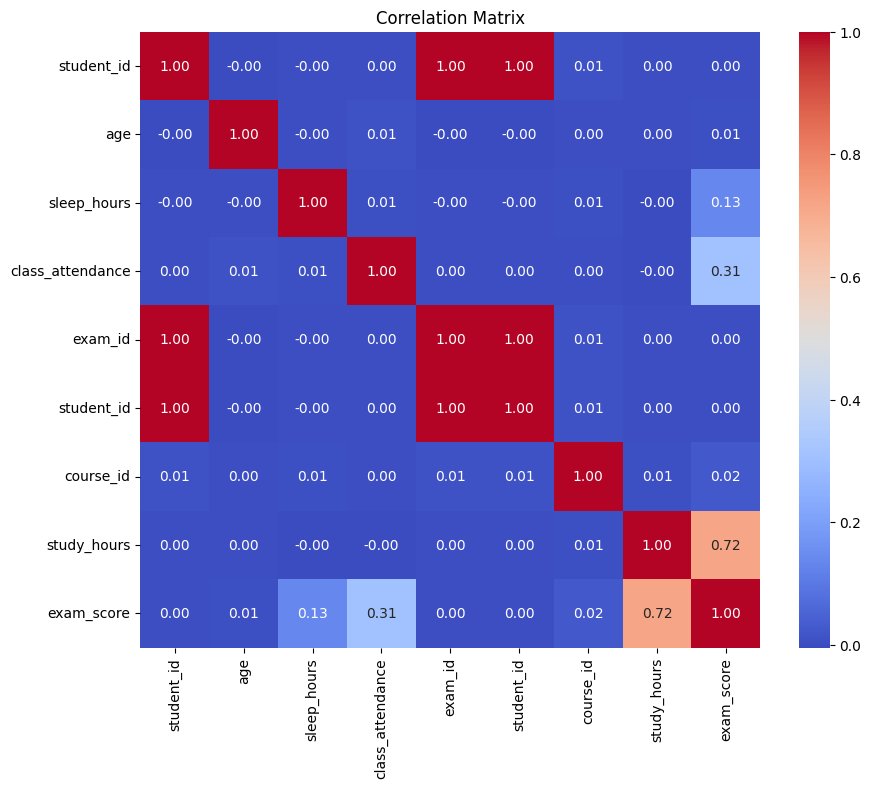

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()